<a href="https://colab.research.google.com/github/tamiresco/Spike-Timing/blob/master/Timing_Antigo_Rascunho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introdução

* Data Frame 1: Dados (quase) originais
* Data Frame 2: Dados organizados por distribuições de intervalos
* Data Frame 3: Dados das distribuiçoes
* Modelo: Com os atributos das distribuições da sessao 1 e 2(?) preveremos quando o rato acertara 8 de 10 trials da sessao 7(?)



Envirolment setting up

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# codigo reyes
!git clone -l -s git://github.com/mbreyes/drrd.git clonedrepo
from clonedrepo.python import drrdTools

# feature selection
!pip install boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# model selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error

# model
from xgboost import XGBRegressor

fatal: destination path 'clonedrepo' already exists and is not an empty directory.


### Data Frame 1 - Funções

In [ ]:
def readFile (rats = range(64, 68), sessions = [1,2,3,4,6,7]):

  # variaveis q armazenaram o nome dos ratos, os dados de cada rato e de qual trial sao esses dados
  ratsNumbers = []
  ratsData = []
  ratsTrials = []
  error = []

  # armazenando dados de cada rato
  for i in rats: 
    for j in sessions:

      try:
        df = pd.DataFrame(data= drrdTools.drrd(prefix='AB1',animalID=i,sessions=[j],plotFlag=True, dataPath='/content/'))
        ratsData.append(df)
        trial = 0

        # armazenando numero do rato para quando combinar os dados saber quais linhas sao de qual rato
        for row in df.iterrows():
          ratsNumbers.append(i)
          ratsTrials.append(trial)
          trial += 1

      except: 
        error.append((i,j))
        pass
  
  return ratsNumbers, ratsData, ratsTrials, error

In [ ]:
def createDataFrame1 (rats = range(64, 68), sessions = [1,2,3,4,6,7]):

  ratsNumbers, ratsData, ratsTrials, error = readFile(rats, sessions)

  # juntando os dados de cada rato em um data frame só
  dataFrame1 = pd.concat(ratsData)

  # dando nome as colunas
  columns = ['press', 'notPress', 'sucess', 'valid', 'target', 'session'] 
  dataFrame1.columns = columns

  # adicionando a coluna do numero do rato e numero do trial
  dataFrame1['rat'] = ratsNumbers
  dataFrame1['trial'] = ratsTrials

  return dataFrame1, error

def createStructureDataFrame2 (dataFrame1):

  # para criar o segundo data frame:
  # selecionando os primeiros trials para depois retirarmos todas as linhas que não sao do primeiro trial e termos só a sessão
  indexFirstTrial = dataFrame1[ dataFrame1['trial'] != 0 ].index
  dataFrame2 = dataFrame1.drop(indexFirstTrial)

  # no data frame 2 retiramos as colunas 'press', 'notPress', 'sucess', 'valid' e tbm fazendo a transformação para indexadores
  dataFrame2.drop(['press', 'notPress', 'sucess', 'valid', 'trial','target' ], axis=1, inplace = True)
  dataFrame2.set_index(['rat', 'session'], inplace = True) 

  return dataFrame2

def cleanDataFrame1(dataFrame1): 

  # Agora podemos tirar no data frame 1 os invalidos e colocar os ratos, sessoes e trials como idexadores ao inves de colunas
  dataFrame1.drop(dataFrame1[dataFrame1.valid == 0].index, inplace=True)
  dataFrame1.set_index(['rat', 'session', 'trial'], inplace = True) 
  dataFrame1.drop(['valid', 'target'], axis=1, inplace = True)

  # retirando NaN
  # TODO rever a abrangencia do intervalo ao tirar uma linha que possivelmente ditaria o fim de um intervalo
  # Posso substituir o NaN pela media ao inves tbm
  dataFrame1.dropna(how='any', inplace=True)
  
  # TODO retirar outliers (tem dois jeitos: tradicional z-score ou sklearn.ensemble IsolationForest)


### Data Frame 1 - Rodando

In [ ]:
rats = range (1,6) #range(1, 75) 
sessions = range(1,7) # list(set(range(1,7)) - set([5])) #list(set(1,7) - {5})

________________________________________________________________________________
692
692
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  0 7
Rat1  Trials:692  Reinforced:131  Non-Reinforced:191  Invalid:370



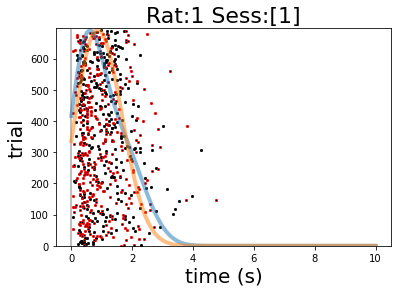

________________________________________________________________________________
506
506
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  102 144
Rat1  Trials:506  Reinforced:162  Non-Reinforced:211  Invalid:133



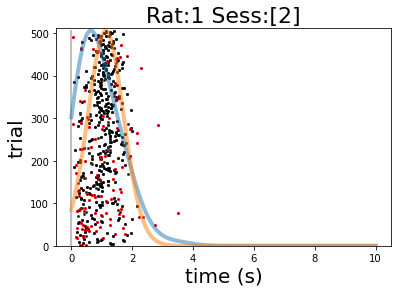

________________________________________________________________________________
602
602
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Successfully fixed
[1.0]
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  406 482
Rat1  Trials:602  Reinforced:122  Non-Reinforced:292  Invalid:188



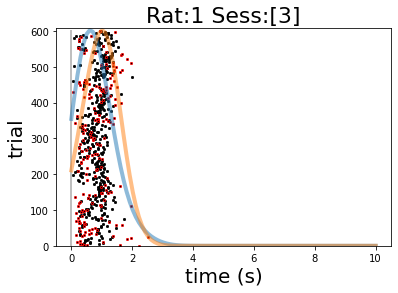

________________________________________________________________________________
418
418
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  137 171
Rat1  Trials:418  Reinforced:130  Non-Reinforced:228  Invalid:60



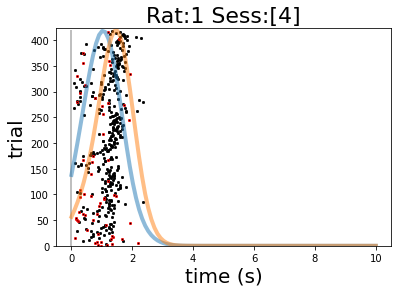

________________________________________________________________________________
183
183
________________________________________________________________________________
Rat1  Trials:183  Reinforced:115  Non-Reinforced:57  Invalid:11

Number of trials to split too large, trials split in half


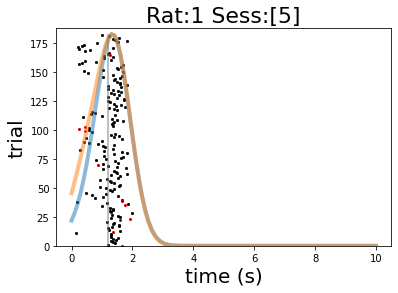

________________________________________________________________________________
222
222
________________________________________________________________________________
Rat1  Trials:222  Reinforced:144  Non-Reinforced:63  Invalid:15



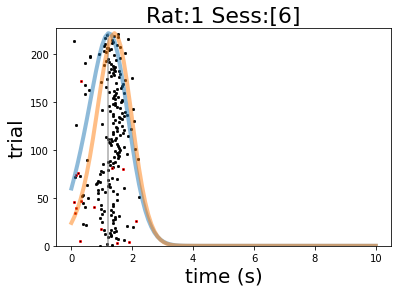

________________________________________________________________________________
1150
1150
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Successfully fixed
[0.6]
Rat2  Trials:1150  Reinforced:111  Non-Reinforced:272  Invalid:767



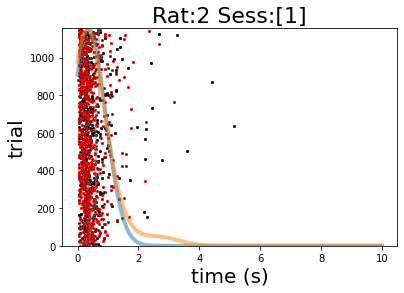

________________________________________________________________________________
875
875
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Successfully fixed
[0.3]
Trying to fix inconsistencies in prime times
Successfully fixed
[0.4]
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  213 348
Rat2  Trials:875  Reinforced:153  Non-Reinforced:285  Invalid:437



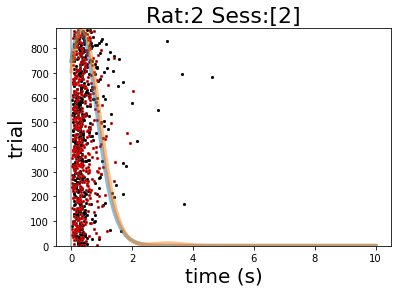

________________________________________________________________________________
1003
1002
________________________________________________________________________________
Rat2  Trials:1002  Reinforced:126  Non-Reinforced:367  Invalid:509



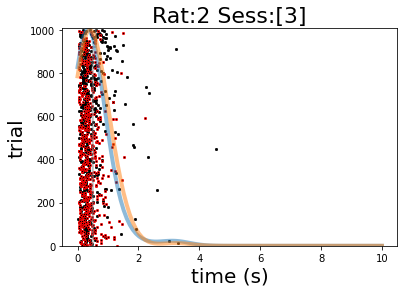

________________________________________________________________________________
682
682
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  108 145
Rat2  Trials:682  Reinforced:167  Non-Reinforced:300  Invalid:215



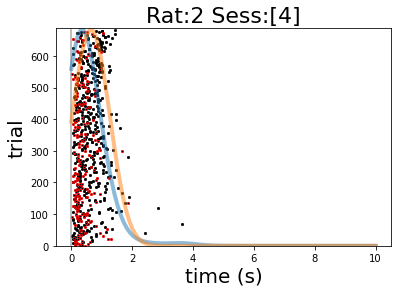

________________________________________________________________________________
586
585
________________________________________________________________________________
Rat2  Trials:585  Reinforced:141  Non-Reinforced:269  Invalid:175



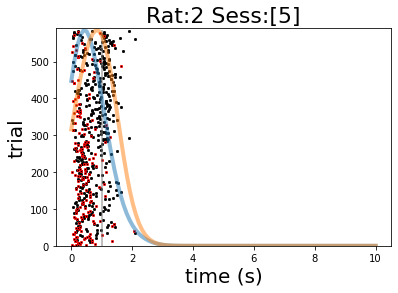

________________________________________________________________________________
654
654
________________________________________________________________________________
Rat2  Trials:654  Reinforced:185  Non-Reinforced:254  Invalid:215



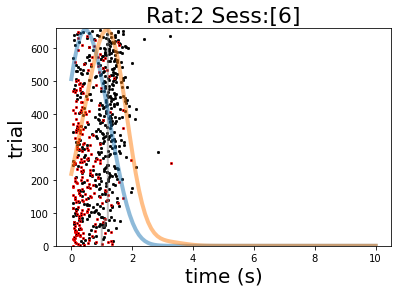

________________________________________________________________________________
237
237
________________________________________________________________________________
Rat3  Trials:237  Reinforced:60  Non-Reinforced:92  Invalid:85



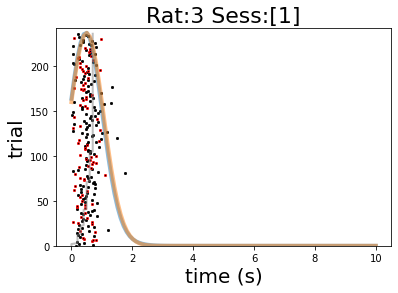

________________________________________________________________________________
407
407
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  276 348
Rat3  Trials:407  Reinforced:113  Non-Reinforced:142  Invalid:152



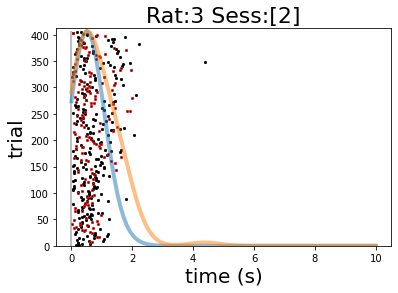

________________________________________________________________________________
656
656
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  244 283
Rat3  Trials:656  Reinforced:137  Non-Reinforced:223  Invalid:296



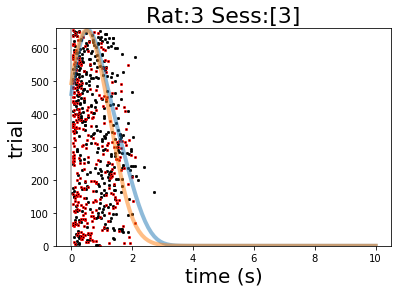

________________________________________________________________________________
123
123
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  43 123
Rat3  Trials:123  Reinforced:16  Non-Reinforced:46  Invalid:61

Number of trials to split too large, trials split in half


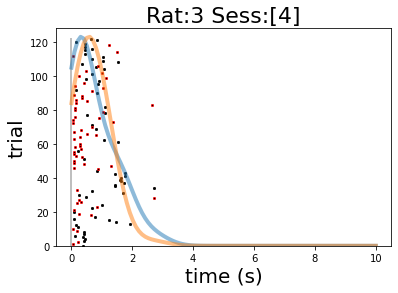

________________________________________________________________________________
261
261
________________________________________________________________________________
Rat3  Trials:261  Reinforced:47  Non-Reinforced:96  Invalid:118



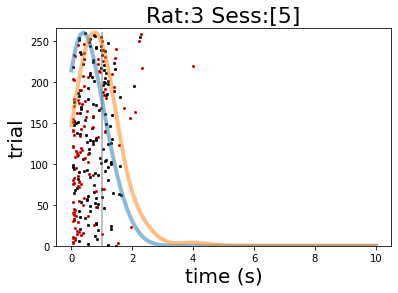

________________________________________________________________________________
139
139
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  30 68
Rat3  Trials:139  Reinforced:19  Non-Reinforced:62  Invalid:58

Number of trials to split too large, trials split in half


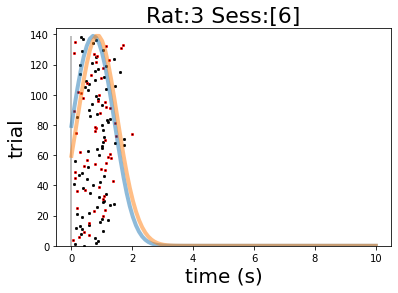

________________________________________________________________________________
580
580
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Successfully fixed
[1.8]
Rat4  Trials:580  Reinforced:78  Non-Reinforced:180  Invalid:322



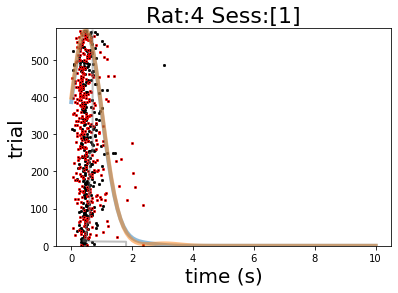

________________________________________________________________________________
599
599
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  24 115
Rat4  Trials:599  Reinforced:120  Non-Reinforced:198  Invalid:281



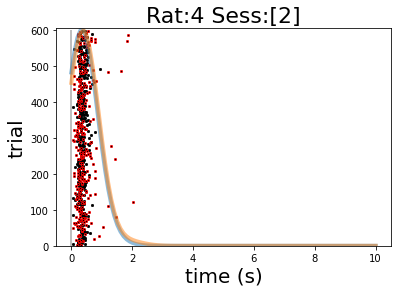

________________________________________________________________________________
678
678
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  512 678
Rat4  Trials:678  Reinforced:81  Non-Reinforced:241  Invalid:356



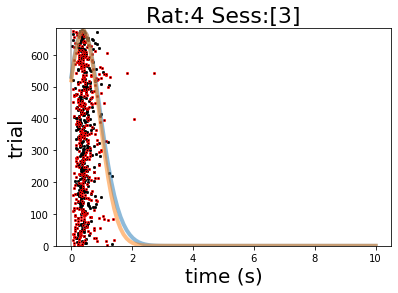

________________________________________________________________________________
644
644
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  180 252
Rat4  Trials:644  Reinforced:107  Non-Reinforced:248  Invalid:289



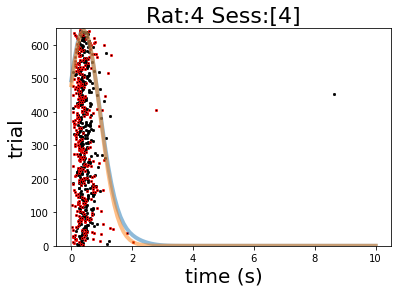

________________________________________________________________________________
180
180
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  61 160
Rat4  Trials:180  Reinforced:37  Non-Reinforced:78  Invalid:65

Number of trials to split too large, trials split in half


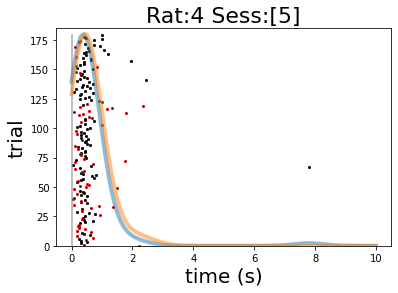

________________________________________________________________________________
708
708
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Successfully fixed
[0.6]
Rat4  Trials:708  Reinforced:109  Non-Reinforced:258  Invalid:341



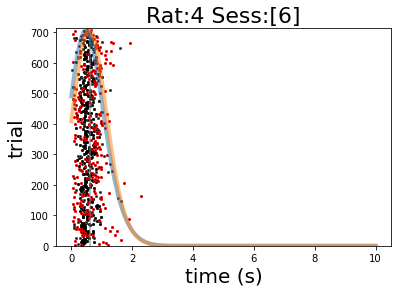

________________________________________________________________________________
531
531
________________________________________________________________________________
Rat5  Trials:531  Reinforced:62  Non-Reinforced:151  Invalid:318



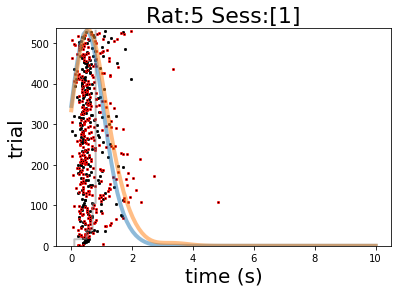

________________________________________________________________________________
729
729
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  206 481
Rat5  Trials:729  Reinforced:118  Non-Reinforced:184  Invalid:427



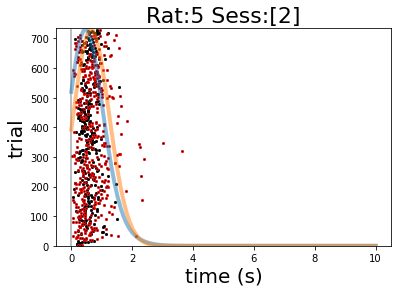

________________________________________________________________________________
552
552
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  272 336
Rat5  Trials:552  Reinforced:113  Non-Reinforced:173  Invalid:266



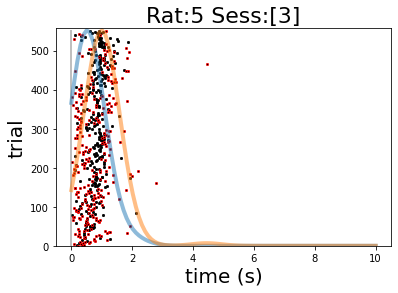

________________________________________________________________________________
403
403
________________________________________________________________________________
Trying to fix inconsistencies in prime times
Unable to fix
inconsistency found
i, j =  37 72
Rat5  Trials:403  Reinforced:107  Non-Reinforced:160  Invalid:136



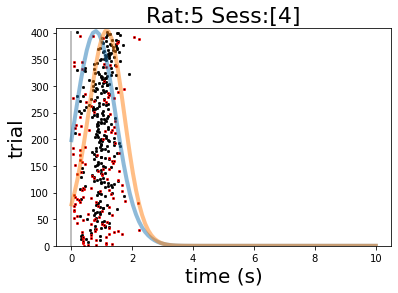

________________________________________________________________________________
298
298
________________________________________________________________________________
Rat5  Trials:298  Reinforced:113  Non-Reinforced:111  Invalid:74



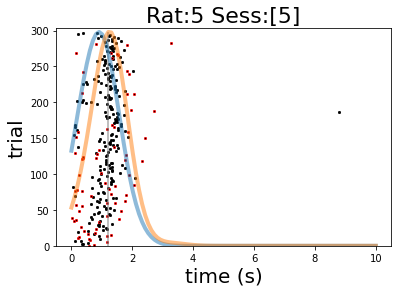

________________________________________________________________________________
212
212
________________________________________________________________________________
Rat5  Trials:212  Reinforced:107  Non-Reinforced:50  Invalid:55



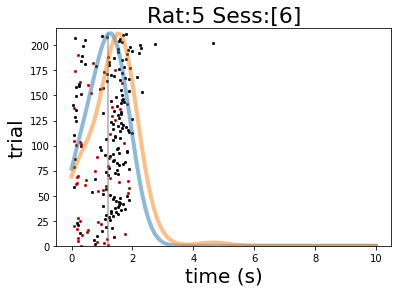

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[]

In [ ]:
dataFrame1, error = createDataFrame1(rats, sessions)

dataFrame2 = createStructureDataFrame2(dataFrame1)

cleanDataFrame1(dataFrame1)

error

In [ ]:
dataFrame1.describe()



----
### Data Frame 2 - Funções


In [ ]:
def distribuitions(dataFrame1, dataFrame2):
  ''' As distribuições usuais sao: de duracao das respostas (T) e as do intervalos entre respostas (ITI). 
      Alem delas distribuicoes de outros intervalos, como a duração apenas das respostas certas. 
      Abaixo, nos comentarios tem as definicoes dos outros tipos de intervalos.
      Lembrar que o intervalo é do tipo [a;b[, i.e., o  primeiro elemento do intervalo é incluido e o ultimo nao. '''

  init = [[] for i in range(len(sessions) * len(rats))] #index de ratos * sessoes

  # Distribuições com numero de itens igual ao numero de trials
  T = [] # intervalos de duracao das respostas
  ITI = [] # intervalos entre respostas 

  # Distribuições com numero de itens igual ao numero de trials corretos
  A = [] # intervalos de duracao das respostas certas
  B = init # intervalos entre resposta certa e resposta certa 
  C = init # intervalos entre resposta certa e qualquer resposta = intervalos entre recompensa e qualquer resposta
  D = init # intervalos entre recompensa e recompensa = intervalos entre resposta certa e recompensa

  # Distribuições com numero de itens igual ao numero de trials incorretos
  E = [] # intervalos de duracao das respostas erradas
  F = init # intervalos entre resposta errada e resposta errada 
  G = init # intervalos entre resposta errada e qualquer resposta

  # Demais distribuições
  H = init # intervalos entre resposta certa e resposta errada
  I = init # intervalos entre resposta errada e resposta certa 
  J = init # intervalos entre resposta errada e recompensa

  # esse loop é com o dataFrame2, q so tem ratos e sessoes no index, pq queremos a distribuicao de cada sessao de cada rato
  for i, rows in dataFrame2.iterrows():

    # pega todos os trials dessa sessao e desse rato criando um vetor p eles q é adcionado nas variaveis T, ITI, A e E
    # so fazems esses 4 tipos de intervalo agora pq os outros demandam outro tipo de loop
    T.append(dataFrame1.at[(i[0],i[1]),'press']) 
    ITI.append(dataFrame1.at[(i[0],i[1]),'notPress']) 
    A.append(dataFrame1[dataFrame1['sucess'] == 1].at[(i[0],i[1]),'press'])
    E.append(dataFrame1[dataFrame1['sucess'] != 1].at[(i[0],i[1]),'press'])
    
  return T, ITI, A, B, C, D, E, F, G, H, I, J


In [ ]:
def addColumns(dataFrame1, dataFrame2):
  ''' Adiciona ao data frame 2 como colunas as distribuicoes de intervalos das sessoes'''

  T, ITI, A, B, C, D, E, F, G, H, I, J = distribuitions(dataFrame1, dataFrame2)

  dataFrame2['T'] = T
  dataFrame2['ITI'] = ITI
  dataFrame2['A'] = A
  dataFrame2['B'] = B
  dataFrame2['C'] = C
  dataFrame2['D'] = D
  dataFrame2['F'] = F
  dataFrame2['E'] = E
  dataFrame2['G'] = G
  dataFrame2['H'] = H
  dataFrame2['I'] = I
  dataFrame2['J'] = J

  # init = [0 for i in range(len(sessions) * len(rats))]
  # dataFrame2['sucess'] = init

In [ ]:
def createAndAddData (dataFrame1, dataFrame2):
  ''' Gera os tipos de Intervalos e os adciona em suas respectivas distribuicoes, q são as colunas do dataFrame2 '''

  # criando variaveis que gauardaram o tempo de uma seuquencia de sucesso ou fracasso
  sucessSequence = 0; failSequence = 0

  # ja nesse loop usamos dataFrame1 q tem trials no index, pq a variaveis variam de acordo com os trials
  for i, rows in dataFrame1.iterrows():
    
    # esse ele acertou
    if dataFrame1.at[(i[0],i[1],i[2]),'sucess'] == 1:

      # totalSucess = totalSucess +1
      # dataFrame2.loc[(i[0],i[1]),'sucess'] = totalSucess
      # totalSucess = 0

      # dataFrame2.loc[(i[0],i[1]),'sucess']+1 
      
      # dataFrame2.loc[(i[0],i[1]),'sucess'].sum(1)

      # é o primeiro trial valido
      if i[2] == min(dataFrame1.loc[(i[0],i[1])].index):     
        sucessSequence = sucessSequence + dataFrame1.at[(i[0],i[1],i[2]),'press'] + dataFrame1.at[(i[0],i[1],i[2]),'notPress']

      # é um dos trials seguintes ao primeiro valido
      else:
        # e o anterior ele acertou tbm
        if dataFrame1.at[(i[0],i[1],(i[2]-1)),'sucess'] == 1:
          dataFrame2.loc[(i[0],i[1]),'C'].append(dataFrame1.at[(i[0],i[1],(i[2]-1)),'notPress'])     
          sucessSequence = sucessSequence + dataFrame1.at[(i[0],i[1],i[2]),'press'] + dataFrame1.at[(i[0],i[1],i[2]),'notPress']

        # mas o anaterior ele errou
        else: 
          dataFrame2.loc[(i[0],i[1]),'B'].append(sucessSequence)
          dataFrame2.loc[(i[0],i[1]),'D'].append(sucessSequence +dataFrame1.at[(i[0],i[1],i[2]),'press'])
          dataFrame2.loc[(i[0],i[1]),'G'].append(dataFrame1.at[(i[0],i[1],(i[2]-1)),'notPress'])
          dataFrame2.loc[(i[0],i[1]),'I'].append(dataFrame1.at[(i[0],i[1],(i[2]-1)),'notPress'])
          sucessSequence = 0

    # esse ele errou
    else:
      # é o primeiro trial valido
      if i[2] == min(dataFrame1.loc[(i[0],i[1])].index):     
        failSequence = failSequence + dataFrame1.at[(i[0],i[1],i[2]),'press'] + dataFrame1.at[(i[0],i[1],i[2]),'notPress'] 

      # é um dos trials seguintes ao primeiro valido
      else:       
        # e o anterior ele errou tbm    
        if dataFrame1.at[(i[0],i[1],(i[2]-1)),'sucess'] != 1:
          dataFrame2.loc[(i[0],i[1]),'G'].append(dataFrame1.at[(i[0],i[1],(i[2]-1)),'notPress'])      
          failSequence = failSequence + dataFrame1.at[(i[0],i[1],i[2]),'press'] + dataFrame1.at[(i[0],i[1],i[2]),'notPress'] 

        # mas o anterior ele acertou
        else: 
          dataFrame2.loc[(i[0],i[1]),'F'].append(failSequence)
          dataFrame2.loc[(i[0],i[1]),'J'].append(failSequence + dataFrame1.at[(i[0],i[1],i[2]),'press'])
          dataFrame2.loc[(i[0],i[1]),'C'].append(dataFrame1.at[(i[0],i[1],(i[2]-1)),'notPress'])     
          dataFrame2.loc[(i[0],i[1]),'H'].append(dataFrame1.at[(i[0],i[1],(i[2]-1)),'notPress'])
          failSequence = 0

In [ ]:
def alterIndex (df):
  '''Adiciona mais uma camada de index e de nomes de colunas. Isso sera necessarios para a função Plots'''

  # pegando so o trecho do dataframe q é desse rato
  # df = df.loc(axis=0)[[rat], :]

  # ascrecentando index de 1 a 30 
  df['n'] = range(0,len(df))
  df.set_index(['n'], append=True, inplace = True)

  # ascrecentando nome das colunas de '1' a '12' 
  x = [str(i) for i in np.array(range(len(df.columns)))] # criando o index das colunas novo
  array = [df.columns, x] # unindo o index das colunas novo ao antigo
  df.columns = pd.MultiIndex.from_arrays(array) # fazendo a duas camadas de index das colunas 

def plots(df, dt = 0.1, bw_method = 'scott'):

  alterIndex(df)

  # inicializando a estrutura dos subplots
  cols = len(df.columns)
  rows = len(df.index)
  fig = plt.figure(figsize=[3*cols, 5*rows] , constrained_layout=True, clear=True, dpi = 200)
  gs = fig.add_gridspec(cols,rows)

  for i in df.index:
     for j in df.columns: 

       grid, pdf = kernelDensityEstimation(df.loc[i,j], dt, bw_method)
       fig.add_subplot(gs[int(j[1]), i[2]]).plot(grid, pdf) #plotar o grafico, o grid definirá o eixo x e o pdf o eixo y
       fig.add_subplot(gs[int(j[1]), i[2]]).set_title('Rat: ' + str(i[0]) + ' - Session: '+ str(i[1]) + ' - Interval: ' + str(j[0]) + '\n') 
  
  plt.savefig('ratinhos.png')

In [ ]:
# porcentagem de acerto por sessao
dataFrame1.at[(i[0],i[1],(i[2]),'sucess'] == 1

### Data Frame 2 - Rodando

In [ ]:
addColumns (dataFrame1, dataFrame2)
createAndAddData (dataFrame1, dataFrame2)

KeyError: ignored

In [ ]:
dataFrame2

Empty DataFrame
Columns: []
Index: [(1, 1.0), (1, 2.0), (1, 3.0), (1, 4.0), (1, 5.0), (1, 6.0), (2, 2.0), (2, 4.0), (2, 5.0), (2, 6.0), (3, 1.0), (3, 2.0), (3, 3.0), (3, 4.0), (3, 5.0), (3, 6.0), (4, 1.0), (4, 2.0), (4, 3.0), (4, 4.0), (4, 5.0), (4, 6.0), (5, 1.0), (5, 2.0), (5, 3.0), (5, 4.0), (5, 5.0), (5, 6.0), (6, 1.0), (6, 2.0), (6, 3.0), (6, 4.0), (6, 5.0), (6, 6.0), (7, 1.0), (7, 2.0), (7, 3.0), (7, 4.0), (7, 5.0), (7, 6.0), (8, 1.0), (8, 2.0), (8, 3.0), (8, 4.0), (8, 5.0), (8, 6.0), (9, 1.0), (9, 2.0), (9, 3.0), (9, 4.0), (9, 5.0), (9, 6.0), (10, 1.0), (10, 2.0), (10, 3.0), (10, 4.0), (10, 5.0), (10, 6.0), (11, 1.0), (11, 2.0), (11, 3.0), (11, 4.0), (11, 5.0), (11, 6.0), (12, 1.0), (12, 2.0), (12, 3.0), (12, 4.0), (12, 5.0), (12, 6.0), (13, 1.0), (13, 2.0), (13, 3.0), (13, 4.0), (13, 5.0), (13, 6.0), (14, 1.0), (14, 2.0), (14, 3.0), (14, 4.0), (14, 5.0), (14, 6.0), (15, 1.0), (15, 2.0), (15, 3.0), (15, 4.0), (15, 5.0), (15, 6.0), (16, 1.0), (16, 2.0), (16, 3.0), (16, 4.0), (16, 5.0), (16, 6.0), (17, 1.0), (17, 2.0), (17, 3.0), (17, 4.0), (17, 5.0), (17, 6.0), ...]

[425 rows x 0 columns]

In [ ]:
# dataFrame2.head().applymap(lambda x: np.mean(x))
# plots(dataFrame2.head(6))

----
### Data Frame 3 - Funções

Medidas da Teoria da Informação:

1. **[Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))** is a basic quantity in information theory associated to any random variable, which can be interpreted as the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes.
2. **[Joint entropy](https://en.wikipedia.org/wiki/Joint_entropy)** is a measure of the uncertainty associated with a set of variables.
3. **[Conditional entropy](https://en.wikipedia.org/wiki/Conditional_entropy)** quantifies the amount of information needed to describe the outcome of a random variable Y given that the value of another random variable X is known. Here, information is measured in shannons, nats, or hartleys. The entropy of Y conditioned on X is written as H(Y|X).
4. **[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy)** between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.
5. **[Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback–Leibler_divergence)** (also called relative entropy) is a measure of how one probability distribution is different from a second, reference probability distribution.
6. **Symmetrised Kullback-Leibler divergence**
7. **[Jensen-Shannon divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence)** is a method of measuring the similarity between two probability distributions.
8. **[Mutual information](https://en.wikipedia.org/wiki/Mutual_information)** of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons, commonly called bits) obtained about one random variable through observing the other random variable. 
9. **Normalised mutual information** (7 variants)
10. **[Variation of information](https://en.wikipedia.org/wiki/Variation_of_information)**  the variation of information or shared information distance is a measure of the distance between two clusterings (partitions of elements).
11. **Lautum information**
12. **[Conditional mutual information](https://en.wikipedia.org/wiki/Conditional_mutual_information)** is, in its most basic form, the expected value of the mutual information of two random variables given the value of a third.
13. **[Interaction Information](https://en.wikipedia.org/wiki/Interaction_information)** is a generalization of mutual information, but unlike the mutual information, the interaction information can be either positive or negative. 
14. **Co-information** is the same as Interaction Information by wikipedia.
15. **[Multi-information](https://en.wikipedia.org/wiki/Total_correlation)** or total correlation (Watanabe 1960) is one of several generalizations of the mutual information.
16. **Binding information**
17. **[Residual entropy](https://en.wikipedia.org/wiki/Residual_entropy)** is the difference in entropy between a non-equilibrium state and crystal state of a substance close to absolute zero. 
18. **Exogenous local information**
19. **Enigmatic information**

In [ ]:
def add_columns_mean(dataFrame2): 

  df_mean = dataFrame2.loc[:,['T', 'A', 'E']].applymap(lambda x: np.mean(x)).groupby(level=0).mean()
  df_mean.rename({'T': 'T_mean', 'A' : 'A_mean', 'E': 'E_mean'}, axis=1, inplace=True)
 
  df_std = dataFrame2.loc[:,['T', 'A', 'E']].applymap(lambda x: np.std(x)).groupby(level=0).mean() 
  df_std.rename({'T': 'T_std', 'A' : 'A_std', 'E': 'E_std'}, axis=1, inplace=True)
  
  df_kurtosis = dataFrame2.loc[:,['T', 'A', 'E']].applymap(lambda x: stats.kurtosis(x)).groupby(level=0).mean()
  df_kurtosis.rename({'T': 'T_kurtosis', 'A' : 'A_kurtosis', 'E': 'E_kurtosis'}, axis=1, inplace=True)

  dataFrame3 = pd.concat([df_mean, df_std, df_kurtosis], axis =1)

  return dataFrame3

def bays(likelihood, prior, posteriorTrue, tmax = 5):  # ou tmax = max(likelihood)

  # alisando as 3 curvas de distribuicao e colocando como maximo o tmax
  grid1, likelihood = kernelDensityEstimation (likelihood, dt=0.1, bw_method = 'scott', tmax=tmax)
  grid2, prior = kernelDensityEstimation (prior, dt=0.1, bw_method = 'scott', tmax=tmax)
  grid3, posteriorTrue = kernelDensityEstimation (posteriorTrue, dt=0.1, bw_method = 'scott', tmax=tmax)

  # formula de probalibilidade condicional
  posteriorEstimation = [prior[i] * likelihood[i] for i in range(len(likelihood))] 

  # comparacao distribuicao estimada por update baysiano e distribuicao real
  score = mean_absolute_error(posteriorEstimation, posteriorTrue)

  return (score) 

def add_columns_bays_error(dataFrame2, dataFrame3):

  # preparacao
  df = dataFrame2.drop(['ITI', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J' ], axis=1)
  score = []
  mean_score = []

  for j in df.columns:  
    for i in dataFrame3.index:

      # aplicando a funcao q compara a distribuicao posterior esperada com a real em 2 conjuntos
      score.append( bays(df.at[(i,1),j], df.at[(i,2),j], df.at[(i,3),j]))
      score.append( bays(df.at[(i,2),j], df.at[(i,3),j], df.at[(i,6),j]))

      # depois tira-se a media do erro dos dois conjuntos
      mean_score.append(np.mean(score))

      # esvazia para fazer o calculo para o proximo rato
      score = []

  # fragmentar o vetor por distribuição (cada distribuicao tem nRats q estao empilhalhos)
  nRats = len(dataFrame3.index) 
  dataFrame3['T_bays'] = mean_score[0 : nRats]
  dataFrame3['A_bays'] = mean_score[nRats : 2*nRats]
  dataFrame3['E_bays'] = mean_score[2*nRats : 3*nRats]

  return dataFrame3

In [ ]:
def kernelDensityEstimation (df, dt, bw_method, tmax = 0): #axs, i, j

  tmin = 0

  if tmax == 0:
    tmax = max(df)

  kde = stats.gaussian_kde(df, bw_method=bw_method ) # instanciar gaussian_kde
  counts = int((tmax - tmin) / dt) # criar intervalo com mesma quantidade de canais que o histograma  
  grid = np.linspace(tmin, tmax, counts) #  continuando a criação
  pdf = kde.evaluate(grid)
  
  return grid, pdf

def differentialEntropy(p, dt, unidade = 'digits'):
  
  # multiplicação por dt garante a continuidade da variavel
  if unidade == 'nats':
    h = -np.sum(p*np.log(p))*dt 
  elif unidade == 'digits':
    h = -np.sum(p*np.log10(p))*dt
  elif unidade == 'bits':
    h = -np.sum(p*np.log2(p))*dt

  return h

def entropy (df, dt = 0.1, bw_method = 'scott'): # bw é o parametro bandwidth que determina o quão suavisada sera a curva 

  grid, pdf = kernelDensityEstimation(df, dt, bw_method) # estimar densidade probabilistica com kernel 
  h_kde = differentialEntropy(pdf, dt)  # calcular sua entropia diferencial
  
  return np.round(h_kde,2)

def add_columns_entropy(dataFrame2, dataFrame3): #TO DO

  df = dataFrame2.applymap(lambda x: entropy(x)).groupby(level=0).mean()
  df.rename({'T': 'T_entropy', 'ITI': 'ITI_entropy', 'A' : 'A_entropy', 'B': 'B_entropy', 'C': 'C_entropy', 'D': 'D_entropy', 'E': 'E_entrpy', 'F': 'F_entropy', 'G': 'G_entropy', 'H': 'H_entropy', 'I': 'I_entropy', 'J': 'J_entropy'}, axis=1, inplace=True)
  dataFrame3 = pd.concat([dataFrame3, df], axis =1)

  return dataFrame3

In [ ]:
def preprocessing (dataFrame3): # TO DO fazer de verdade e fazer y

  X = dataFrame3.applymap(lambda x: 100*round(x,2))
  X = X.applymap(lambda x: int(x))
  X = np.array(X)

  y = dataFrame2.applymap(lambda x: np.mean(x)).groupby(level=0).mean()['T'] 
  y = y.apply(lambda x: 100*round(x,2))
  y = y.apply(lambda x: int(x))
  y = np.array(y)

  return X, y
  
def boruta (dataFrame3):

  X, y = preprocessing(dataFrame3)

  #iniciando funcoes 
  rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight= 'balanced_subsample' , max_depth=10) 
  boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1, max_iter = 50, perc = 90) #TO DO entender melhor 

  #aplicando-as aos dados
  boruta_selector.fit(X, y)

  #colunas q passaram no teste de hipotese
  cols_support = X.columns[boruta.support_]
  cols_support_weak_ = X.columns[boruta.upport_weak_]
  
  return X[cols_support], X[cols_support_weak_]

## Data Frame 3 - Rodando

In [ ]:
dataFrame3 = add_columns_mean(dataFrame2)
dataFrame3 = add_columns_bays_error(dataFrame2, dataFrame3)
dataFrame3 = add_columns_entropy(dataFrame2, dataFrame3)
dataFrame3

,T_mean,A_mean,E_mean,T_std,A_std,E_std,T_kurtosis,A_kurtosis,E_kurtosis,T_bays,A_bays,E_bays,T_entropy,ITI_entropy,A_entropy,B_entropy,C_entropy,D_entropy,F_entropy,E_entrpy,G_entropy,H_entropy,I_entropy,J_entropy
rat,,,,,,,,,,,,,,,,,,,,,,,,
64,1.147905,1.913468,0.436304,0.872605,0.593279,0.343891,8.048479,22.371273,-0.692426,0.124584,0.101328,0.093845,0.446667,0.973333,0.301667,1.026667,1.026667,1.026667,1.026667,0.071667,1.026667,1.026667,1.026667,1.026667
65,1.298266,1.606495,0.773381,0.541156,0.366446,0.349074,6.314679,18.137826,-0.725052,0.092124,0.047886,0.066993,0.305000,0.971667,0.093333,1.085000,1.085000,1.085000,1.085000,0.073333,1.085000,1.085000,1.085000,1.085000
66,1.200264,1.554473,0.772838,0.508679,0.329945,0.349179,2.046761,7.539257,-0.861494,0.090208,0.043545,0.063145,0.278333,1.021667,0.046667,1.098333,1.098333,1.098333,1.098333,0.075000,1.098333,1.098333,1.098333,1.098333
67,1.155767,1.864085,0.559019,0.858230,0.749070,0.350544,16.180050,27.494870,-1.186700,0.099131,0.119575,0.069197,0.441667,0.945000,0.341667,1.068333,1.068333,1.068333,1.068333,0.090000,1.068333,1.068333,1.068333,1.068333
68,1.037101,1.581590,0.699807,0.553654,0.405476,0.338939,5.141175,16.243424,-0.898043,0.119665,0.140777,0.113909,0.300000,0.900000,0.096667,1.020000,1.020000,1.020000,1.020000,0.078333,1.020000,1.020000,1.020000,1.020000
69,0.736888,1.725017,0.442996,0.628400,0.517929,0.327264,4.070717,6.531098,-0.604909,0.116758,0.081978,0.116085,0.293333,0.851667,0.248333,0.915000,0.915000,0.915000,0.915000,0.053333,0.915000,0.915000,0.915000,0.915000
70,0.744996,1.510960,0.542196,0.502617,0.387144,0.314879,3.790622,6.894568,-0.908314,0.095912,0.104701,0.086521,0.245000,0.950000,0.108333,1.071667,1.071667,1.071667,1.071667,0.066667,1.071667,1.071667,1.071667,1.071667
71,1.015433,1.554976,0.670137,0.544189,0.327570,0.347322,0.308290,5.295768,-1.180342,0.096051,0.078547,0.051500,0.315000,0.806667,0.081667,0.921667,0.921667,0.921667,0.921667,0.088333,0.921667,0.921667,0.921667,0.921667
72,1.086328,1.575353,0.656162,0.571005,0.352664,0.362262,1.145091,6.443994,-1.325276,0.101042,0.084947,0.055804,0.323333,0.991667,0.090000,1.101667,1.101667,1.101667,1.101667,0.098333,1.101667,1.101667,1.101667,1.101667


------
## Model

In [ ]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# treinando regressor
xgbr = xgb.XGBRegressor(verbosity=0)  # (?) (n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgbr.fit(X_train, y_train) # (?) (X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False) 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 

# cross validataion com cv = 5 e cv = Kfold (para comparar)
scores = cross_val_score(X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

# testando regressor
y_pred = xgbr.predict(X_test) # (?) nao deveria fazer com um X_valid ate eu ter certeza q é a ultima alteracao q estou fazendo no modelo
r2 = r2_score(y_test, y_pred)
print("r2: %.2f" % r2)
print("r2: %.2f" % (r2*(1/2.0)))

# graficos
x_ax = range(len(ytest))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

  # def cross_validation (model, X, y, cv=5, n_jobs=4, scoring='r2'):

#   X, X_week = boruta(X, y)
#   score = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring)

#   print("Individuals scores: ", scores())
#   print("Average scores: ", scores.mean())